In [25]:
import src.utils.pipelines as pip
%load_ext autoreload
%autoreload 2
# Uncomment the following line to write the data 
#main_chars, top_mov_per_year, cmu_imdb, movies_char, blockbusters, chars, movies = pip.write_CMU_and_IMDB() # /!\ takes a long time
# Uncomment the following line to read the data (way faster)
main_chars, top_mov_per_year, cmu_imdb, movies_char, blockbusters, chars, movies = pip.read_CMU_IMDB()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
#global_names, uk, us, fr, norway = pip.write_all_names_data()
global_names, uk, us, fr, norway = pip.read_all_names_data()

UK : Loading clean data from data/clean/names/ukbabynames.csv
France : Loading clean data from data/clean/names/france.csv
US : Loading clean data from data/clean/names/babyNamesUSYOB-full.csv
Norway : Loading clean data from data/clean/names/norway_merged.csv
UK & France & US & Norway : Loading clean data from data/clean/names/UK_France_US_Norway.csv


In [27]:
mean = pip.load_influenced_means()
#mean = pip.compute_all_influence_mean(main_chars, global_names)

In [40]:
prophet = pip.compute_all_influence_prophet(mean, global_names)


-------------------
Using the mean difference results to speed up the Prophet method......
-------------------
Using 1447 names to speed up the SARIMA method. (from 4407 names)
ETHAN is influenced by a movie in 2000
EMMA is influenced by a movie in 1998
SAMANTHA is influenced by a movie in 1987
SARAH is influenced by a movie in 1977
TAYLOR is influenced by a movie in 1991
JONATHAN is influenced by a movie in 1979
JACK is influenced by a movie in 1995
JACK is influenced by a movie in 1995
JACK is influenced by a movie in 1995
JACK is influenced by a movie in 1997
JONATHAN is influenced by a movie in 1978
SAMANTHA is influenced by a movie in 1984
KYLE is influenced by a movie in 1984
JACK is influenced by a movie in 1994
ALEXANDER is influenced by a movie in 1988
ETHAN is influenced by a movie in 1996
JACK is influenced by a movie in 1993
MIA is influenced by a movie in 2003
MIA is influenced by a movie in 2001
NOAH is influenced by a movie in 2004
CONNOR is influenced by a movie in 199

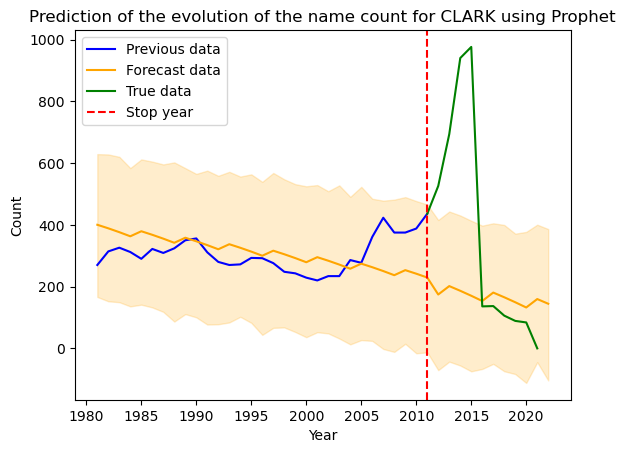

In [39]:
import src.models.naming_prediction as np

pred = pip.is_name_influenced_prophet("CLARK", global_names, 2011, True)